# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: July 15, 2022
* Student Name: Leah Hogenmiller
* Student Net ID: lmh2ur
* This URL: <https://github.com/lmh2ur/monte_carlo/blob/main/final_project_submission.ipynb>
* GitHub Repo URL: <https://github.com/lmh2ur/monte_carlo>

# The Monte Carlo Module

In [ ]:
"""
    The monte carlo simulator module lets you model chance mechanisms such   
    as dice or coins. It does this by using random number generators to   
    model the behavior of random variables. 

    Classes:
        Die
        Game
        Analyzer
    
    Functions:
        change_weights(int, int or float)
        roll_die() -> list 
        show_die() -> dataframe
        play(int) 
        show_play() -> dataframe
        jackpot() -> int
        combo() -> dataframe
        face_counts_per_roll -> dataframe
"""
import pandas as pd
import numpy as np

class Die():
    """
    A class to represent a die. 

    Attributes
    ----------
        faces : list 
            strs, int or floats for faces of die
    
    Methods
    -------
        __init__(list) : initalize with list of faces
        change_weights(int, int or float) : change weight of face
        roll_die(int) : roll die specified amount of time, returns list of faces rolled
        show_die() : returns dataframe of the die object
    """

    def __init__(self, faces):
        """
        Constructor for die object.

        Parameters
        ----------
            faces : list
                strs, ints, or floats of die object faces
        """
        self.faces = faces
        self._weights = []
        for face in faces:
            self._weights.append(1.0)       
        self._df = pd.DataFrame({'die_face':faces, 'die_weight':self._weights})

    def change_weights(self, face, weight):
        """
        Changes the weight of a face of the die.

        Parameters
        ----------
            face : str, int or float 
                specfic die face wanting to be changes
            weight: int or float
                new weight of face

        Returns
        _______
            None

        Raises
        ______
            Exception : when face entered is not in die object 
            Exception : when weight is not an int or float
        """
        if face in self._df['die_face'].values:
            try:
                if isinstance(weight, float) == True or isinstance(float(weight),float) == True:
                    self._df.loc[self._df['die_face'] == face, 'die_weight'] = weight
            except:
                print("Weight is not a number.")
        else:
            print("Choose a face of the die.")

    def roll_die(self, rolls=1): 
        """
        Rolls die and returns list of face values randomly rolled based on weights.

        Parameters
        __________
            rolls : int
                number of rolls, default: rolls = 1
        
        Returns
        _______
            list of faces rolled
        """
        return [self._df['die_face'].sample(weights = self._df['die_weight']).values[0] for i in range(rolls)]
    
    def show_die(self):
        """
        Shows dataframe of die object.

        Parameters
        __________
            None

        Returns
        _______
            dataframe of die, columns = die_face, die_weight

        """
        return self._df


class Game():
    """
    Class for game of multiple dice.

    Attributes
    __________
        dice : list
            list of die objects to be played

    Methods 
    _______
        __init___(list) : initalize with list of die
        play(int) : specify number of rolls to be played
        show_play() : returns dataframe of playing game
    """
    def __init__(self, dice):
        """ 
        Constructor for game object. 

        Parameters
        __________
            dice : list
                list of die objects to be played 
        """
        self.dice = dice

    def play(self, rolls):
        """
        Plays die object a specified amount of times.

        Parameters
        __________
            rolls : int
                number of times to roll dice
        
        Returns
        _______
            None
        """
        self._play = pd.DataFrame({'roll_number':[], 'die_number':[], "face_rolled":[]})
        
        for i in range(rolls):
            for idx, die in enumerate(self.dice):
                _die_roll = Die.roll_die(die)
                _new_roll = pd.DataFrame({'roll_number':[i+1],'die_number':[idx+1], 'face_rolled': [_die_roll]})
                self._play = pd.concat([self._play, _new_roll], ignore_index=True)

        self._play = self._play.astype({'roll_number':'int32', 'die_number':'int32'})
        self._play = self._play.reset_index(drop=True).set_index(['roll_number','die_number'])

    def show_play(self, wide = True):
        """
        Shows dataframe of playing dice.

        Parameters
        __________
            wide : boolean
                returns wide or narrow dataframe, default: wide = True
        
        Returns
        _______
            Dataframe of results from play method with information about roll number, die number and face rolled

        Raises
        ______
            Exception : when wide is not set to a boolean
        """
        if wide == True:
            _wide_df = self._play.face_rolled.unstack()
            return _wide_df
        elif wide == False:
            _narrow_df = self._play
            return _narrow_df
        else:
            print("Set wide equal to True or False.")

class Analyzer():
    """
    Class for analyzing game.

    Attributes
    __________
        game : object
            played game object
        jackpot_count : int
            number of times same faces are rolled
        jackpot_results : dataframe
            all rolls that produced same faces 
        combo_results : dataframe
            counts of all combinations of faces rolled
        face_counts_results : dataframe
            counts of all the faces rolled per roll 
    
    Methods
    _______
        __init__(object) : initalize with game object
        jackpot() : returns count of number of jackpots
        combo() : returns dataframe of combinations and counts
        face_counts_per_roll() : returns dataframe of counts of faces rolled
    """
    def __init__(self, game):
        """
        Constructor for analyzer class. 

        Parameters
        __________
            game : object of played game class
        """
        self.game = Game.show_play(game).astype(str)
    
    def jackpot(self):
        """
        Calculates number of jackpots which is when roll produces all die having the same face.

        Parameters
        __________
            None
        
        Returns
        _______
            jackpot_count : int
                number of jackpots per game
        
        Raise
        _____
            Exception : when there are no jackpots for the game
        """
        _same_faces = self.game.eq(self.game.iloc[:,0],axis=0).all(axis=1)
        self.jackpot_results = self.game[_same_faces]

        self.jackpot_count = 0

        for i in range(len(self.game)):
            if _same_faces[i+1] == True:
                self.jackpot_count += 1

        if self.jackpot_count == 0:
            print("No rolls resulted in all the dice having the same face")
        else:
            return self.jackpot_count
            
    def combo(self):
        """
        Calculates the number of unique combinations in a game.

        Parameters
        __________
            None
        
        Returns
        _______
            combo_results : dataframe
                The different combinations produced and count of each
        """
        self.combo_results = self.game.value_counts().reset_index().rename(columns={0:'count'})

        return self.combo_results
    
    def face_counts_per_roll(self):
        """
        Calculates count of each face rolled per roll.

        Parameters
        __________
            None
        
        Returns
            face_counts_results : dataframe
                count of face rolled per roll
        """

        _face_values_per_roll = self.game.unstack().droplevel(0)

        self.face_counts_results = _face_values_per_roll.groupby(['roll_number']).value_counts().to_frame().reset_index().rename(columns={'level_1': 'face_rolled', 0:'count'}).set_index(['roll_number', 'face_rolled']).unstack(fill_value = 0)

        return self.face_counts_results

# Test Module

In [ ]:
import unittest
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class DieTestSuite(unittest.TestCase):

    def test_1_die(self):
        #check if die faces in dataframe
        test_die1 = Die([1,2,3,4,5,6])
        actual_faces = test_die1.show_die()['die_face'].values.tolist()
        expected_faces = [1,2,3,4,5,6]
        self.assertListEqual(actual_faces, expected_faces)

    def test_2_change_weights(self):
        #change weight of face that is not a number
        test_die1 = Die([1,2,3,4,5,6])
        self.assertRaises(Exception, test_die1.change_weights(1, 'h'))

    def test_2_change_weights(self):
        #change weight of face that is not in face list
        test_die1 = Die([1,2,3,4,5,6])
        self.assertRaises(Exception, test_die1.change_weights(7, 3))

    def test_4_change_weights(self):
        #change weights and check if new weights in dataframe
        test_die1 = Die([1,2,3,4,5,6])
        test_die1.change_weights(1, 1000)
        test_die1.change_weights(3, 57)
        actual_weights = test_die1.show_die()['die_weight'].values.tolist()
        expected_weights = [1000.0, 1.0, 57.0, 1.0, 1.0, 1.0]
        self.assertListEqual(actual_weights, expected_weights)

    def test_5_roll_die(self):
        #roll die 5 times and see if it rolls 5 times based on die face weights
        test_die1 = Die([1,2,3,4,5,6])
        test_die1.change_weights(1, 1000)
        actual = test_die1.roll_die(rolls = 2)
        expected = [1, 1]
        self.assertEqual(actual, expected)

    def test_6_show_die(self):
        #initalize die and check dataframe shape, n = die faces, m = 2
        test_die1 = Die([1,2,3,4])
        actual_shape = test_die1.show_die().shape
        expected_shape = (4,2)
        self.assertEqual(actual_shape, expected_shape)
    
class GameTestSuite(unittest.TestCase):

    def test_1_play(self):
        #play dice and see if length of dataframe equals number of rolls
        test_die1 = Die([1,2,3,4,5,6])
        test_die1.change_weights(3, 10)
        test_die2 = Die([1,2,3,4,5,6])
        test_die2.change_weights(1, 20)
        test_game = Game([test_die1, test_die2])
        test_game.play(rolls=3)
        self.assertEqual(len(test_game.show_play()), 3)

        
    def test_2_show_play(self):
        #play dice and test wide parameter only takes true/false
        test_die1 = Die([1,2,3,4,5,6])
        test_die1.change_weights(3, 20)
        test_die2 = Die([1,2,3,4,5,6])
        test_die2.change_weights(1, 20)
        test_game = Game([test_die1, test_die2])
        test_game.play(rolls=3)
        self.assertRaises(Exception, test_game.show_play(wide='narrow'))
    
    def test_3_show_play(self):
        #play die and check dataframe shape, n = num rolls, m = num die
        test_die1 = Die([1,2,3,4,5,6])
        test_die2 = Die([1,2,3,4,5,6])
        test_game = Game([test_die1, test_die2])
        test_game.play(rolls=8)
        actual_shape = test_game.show_play(wide=True).shape
        expected_shape = (8, 2)
        self.assertEqual(actual_shape, expected_shape)

    def test_4_show_play(self):
        #play die and check dataframe shape, n = num rolls * num die, m = 1 (narrow form)
        test_die1 = Die([1,2,3,4,5,6])
        test_die2 = Die([1,2,3,4,5,6])
        test_game = Game([test_die1, test_die2])
        test_game.play(rolls=8)
        actual_shape = test_game.show_play(wide=False).shape
        expected_shape = (16, 1)
        self.assertEqual(actual_shape, expected_shape)

class AnalyzerTestSuite(unittest.TestCase):

    def test_1_jackpot(self):
        #set die so that none will have the same results
        test_die1 = Die([1,2,3,4,5,6])
        test_die2 = Die([1,2,3,4,5,6])
        test_die1.change_weights(1, 1000)
        test_die2.change_weights(5, 1000)
        test_game = Game([test_die1, test_die2])
        test_game.play(rolls=3)
        test_analyzer = Analyzer(test_game)
        self.assertRaises(Exception, test_analyzer.jackpot())
    
    def test_2_jackpot(self):
        #set die so that all rolls will have same result to test jackpot count
        test_die1 = Die([1,2,3,4,5,6])
        test_die2 = Die([1,2,3,4,5,6])
        test_die1.change_weights(1, 1000)
        test_die2.change_weights(1, 1000)
        test_game = Game([test_die1, test_die2])
        test_game.play(rolls=3)
        test_analyzer = Analyzer(test_game)
        self.assertEqual(test_analyzer.jackpot(), 3)

    def test_3_combo(self):
        #set die so that all rolls have same combo and test that dataframe only has one value
        test_die1 = Die([1,2,3,4,5,6])
        test_die2 = Die([1,2,3,4,5,6])
        test_die1.change_weights(1, 1000)
        test_die2.change_weights(1, 1000)
        test_game = Game([test_die1, test_die2])
        test_game.play(rolls=5)
        test_analyzer = Analyzer(test_game)
        self.assertEqual(len(test_analyzer.combo()), 1)
    
    def test_4_face_counts_per_roll(self):
        #see if combo results dataframe length is the same as num rolls
        test_die1 = Die([1,2,3,4,5,6])
        test_die2 = Die([1,2,3,4,5,6])
        test_die1.change_weights(1, 1000)
        test_die2.change_weights(5, 1000)
        test_game = Game([test_die1, test_die2])
        test_game.play(rolls=3)
        test_analyzer = Analyzer(test_game)
        self.assertEqual(len(test_analyzer.face_counts_per_roll()), 3)

if __name__ == '__main__':
    unittest.main(verbosity=3)

# Test Results

test_1_jackpot (__main__.AnalyzerTestSuite) ... ok

test_2_jackpot (__main__.AnalyzerTestSuite) ... ok

test_3_combo (__main__.AnalyzerTestSuite) ... ok

test_4_face_counts_per_roll (__main__.AnalyzerTestSuite) ... ok

test_1_die (__main__.DieTestSuite) ... ok

test_2_change_weights (__main__.DieTestSuite) ... ok

test_4_change_weights (__main__.DieTestSuite) ... ok

test_5_roll_die (__main__.DieTestSuite) ... ok

test_6_show_die (__main__.DieTestSuite) ... ok

test_1_play (__main__.GameTestSuite) ... ok

test_2_show_play (__main__.GameTestSuite) ... ok

test_3_show_play (__main__.GameTestSuite) ... ok

test_4_show_play (__main__.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.055s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

In [ ]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scenario 1

Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
Play a game of 1000 flips of three coins with all fair dice.
Play a game of 1000 flips with two unfair dice and one fair die.
For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
Compute relative frequency as the number of jackpots over the total number of rolls.
Show your results, comparing the two relative frequencies, in a simple bar chart.

In [20]:
fair_coin = Die(['H', 'T'])

unfair_coin = Die(['H', 'T'])
unfair_coin.change_weights('H', 5)

### 3 Fair Coins

In [22]:
game_3coins = Game([fair_coin, fair_coin, fair_coin])
game_3coins.play(rolls = 1000)

analyze_3coins = Analyzer(game_3coins)
relfrq_3coins = analyze_3coins.jackpot()/1000

### 2 Fair Coins and 1 Unfair Coin

In [24]:
game_3mix = Game([fair_coin, fair_coin, unfair_coin])
game_3mix.play(rolls=1000)

analyze_3mix = Analyzer(game_3mix)
relfrq_3mix = analyze_3mix.jackpot()/1000

### Relative Frequency of Jackpots

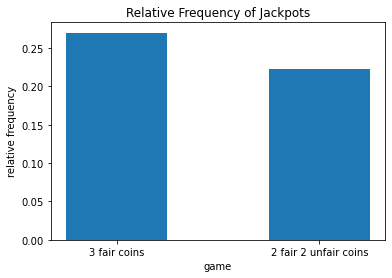

In [26]:
fig, ax  = plt.subplots()
ax.bar([1, 2], [relfrq_3coins, relfrq_3mix], width=0.5,
       tick_label=['3 fair coins', '2 fair 2 unfair coins'])
plt.xlabel('game')
plt.ylabel('relative frequency')
plt.title('Relative Frequency of Jackpots')

plt.show()

## Scenario 2

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.
Play a game of 10000 rolls with 5 fair dice.
Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [27]:
faces = [1, 2, 3, 4, 5, 6]

fair_die = Die(faces)

unfair_die1 = Die(faces)
unfair_die1.change_weights(6, 5)

unfair_die2 = Die(faces)
unfair_die2.change_weights(1, 5)

### 5 Fair Dice

In [29]:
game_5fair = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
game_5fair.play(rolls=10000)

analyze_5fair = Analyzer(game_5fair)
relfrq_5fair = analyze_5fair.jackpot()/10000

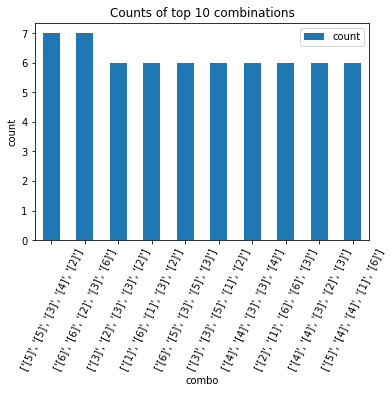

In [30]:
combos_5fair = analyze_5fair.combo()[:10]

combo_labels = combos_5fair.loc[:, combos_5fair.columns != 'count'].values.tolist()

ax = combos_5fair.plot.bar(xlabel='combo',ylabel='count',title='Counts of top 10 combinations')
ax.set_xticklabels(combo_labels, rotation=65)
plt.show()

### 2 Unfair Dice (Type 1), 1 Unfair Die (Type 2) and 2 Fair Dice 

In [33]:
game_5mix = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
game_5mix.play(rolls=10000)

analyze_5mix = Analyzer(game_5mix)
relfrq_5mix = analyze_5mix.jackpot()/10000

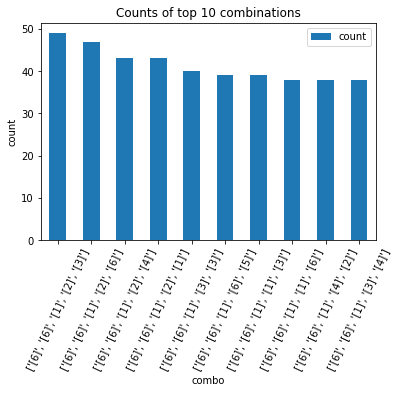

In [34]:
combos_5mix = analyze_5mix.combo()[:10]

combo_labels2 = combos_5mix.loc[:, combos_5mix.columns != 'count'].values.tolist()

ax = combos_5mix.plot.bar(xlabel='combo',ylabel='count',title='Counts of top 10 combinations')
ax.set_xticklabels(combo_labels2, rotation=65)
plt.show()

### Relative Frequency of Jackpots

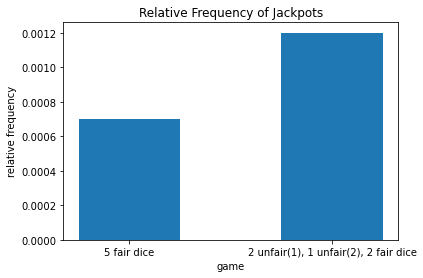

In [35]:
fig, ax  = plt.subplots()
ax.bar([1, 2], [relfrq_5fair, relfrq_5mix], width=0.5,
       tick_label=['5 fair dice', '2 unfair(1), 1 unfair(2), 2 fair dice'])
plt.xlabel('game')
plt.ylabel('relative frequency')
plt.title('Relative Frequency of Jackpots')

plt.show()

## Scenario 3

Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
Play a game involving 5 of these dice with 1000 rolls.
How many combos can you see that look like actual English words?
Based on your eye count, what is the relative frequency of these words versus the rest?

In [36]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', \
           'H', 'I', 'J', 'K', 'L', 'M', 'N', \
           'O', 'P', 'Q', 'R', 'S', 'T', 'U', \
           'V', 'W', 'X', 'Y', 'Z']

frequencies = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, \
              3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, \
              7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, \
              1.0074, 1.2899, 0.2902, 1.779, 0.2722]

letters_die = Die(letters)

for (i, j) in zip(letters, frequencies):
    letters_die.change_weights(i, j)

In [37]:
game_5letters = Game([letters_die, letters_die, letters_die, letters_die, letters_die])
game_5letters.play(rolls=1000)

analyze_5letters = Analyzer(game_5letters)

In [38]:
analyze_5letters.combo()

,1,2,3,4,5,count
0,['A'],['A'],['C'],['T'],['I'],1
1,['O'],['R'],['L'],['P'],['E'],1
2,['O'],['O'],['L'],['I'],['C'],1
3,['O'],['O'],['L'],['I'],['X'],1
4,['O'],['O'],['P'],['G'],['E'],1
...,...,...,...,...,...,...
995,['G'],['I'],['T'],['R'],['A'],1
996,['G'],['L'],['G'],['Q'],['N'],1
997,['G'],['M'],['I'],['I'],['C'],1
998,['G'],['M'],['O'],['T'],['A'],1


Looks like around 5 out of all 1,000 combos are real words so the relative frequency would be 0.005.

# Code blocks with output

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [39]:
!ls -lRF -o

total 272
-rw-r--r--  1 leahhogenmiller   1073 Jul 13 21:28 LICENSE
-rw-r--r--  1 leahhogenmiller     17 Jul 13 21:28 README.md
-rw-r--r--  1 leahhogenmiller  73881 Jul 14 09:21 Scenarios.ipynb
-rw-r--r--  1 leahhogenmiller  36628 Jul 14 10:59 final_project_submission.ipynb
drwxr-xr-x  6 leahhogenmiller    192 Jul 13 21:29 monte_carlo_package/
-rw-r--r--  1 leahhogenmiller    747 Jul 13 15:09 montecarlo_results.txt
-rw-r--r--  1 leahhogenmiller   5471 Jul 13 12:31 montecarlo_test.py
-rw-r--r--  1 leahhogenmiller    377 Jul 13 15:18 setup.py

./monte_carlo_package:
total 32
-rw-r--r--  1 leahhogenmiller    99 Jul 13 15:15 __init__.py
drwxr-xr-x  3 leahhogenmiller    96 Jul 13 15:16 __pycache__/
-rw-r--r--  1 leahhogenmiller  8237 Jul 14 09:33 montecarlo.py

./monte_carlo_package/__pycache__:
total 8
-rw-r--r--  1 leahhogenmiller  282 Jul 13 15:16 __init__.cpython-39.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [40]:
!pip install . 

Processing /Users/leahhogenmiller/MSDS/DS5100/monte_carlo
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for monte-carlo-package: filename=monte_carlo_package-1.0.0-py3-none-any.whl size=4665 sha256=7e06837a149a3e70f53c22bbd7f7f56d23f447b8ebd7240e04876b15bb30593f
  Stored in directory: /private/var/folders/lt/kfwdtm_j42g82m1xvk3wlr340000gn/T/pip-ephem-wheel-cache-vjyh7htv/wheels/16/4b/f1/15518aff11caab7f4fbb8a8fdb2c3c97d4b97d2d5995ff5c24
Successfully built monte-carlo-package
